#  Spike PAtterns DEtection using SPADE


In [1]:
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
np.random.seed(4542)

## computing accuracy

the function developed in the scan + a shift in time

In [2]:
t_stop = 10*pq.s
slope = 1.
A_sync = 0.05
shift = 0.0
A = [0]+[1.-A_sync]+[0]*8+[A_sync]
spiketrains = elephant.spike_train_generation.compound_poisson_process(
                             rate=5*pq.Hz, A=A, shift=shift*pq.ms, t_stop=10*pq.s)
                             


Add a shift:

In [3]:
def ground_truth_spike_synchronous(spiketrains):
    # Function to find the real position of the pattern
    # Works only for synchronus activity, when ALL neurons 
    # are activated at the same time
    # INPUT : spike trains without the added noise
    dict_spiketrains = {}
    # remove the quantity (s) of the spiketrains array
    for neurons in range(len(spiketrains)):
        a = [float(x) for x in spiketrains[neurons]]
        dict_spiketrains[str(neurons)] = a

    list_keys=list(dict_spiketrains.keys())
    common_spikes = set(dict_spiketrains.get(list_keys[0])).intersection(dict_spiketrains.get(list_keys[1]))
    for key in list_keys[1:-1]:
        num_key=int(key)
        common_spikes = set(common_spikes).intersection(dict_spiketrains.get(str(num_key+1)))

    return common_spikes
    
ground_truth_spike_synchronous(spiketrains)

{0.010336536702265134,
 2.306153249870878,
 2.3244673050892177,
 3.0204975456785346,
 3.351244642640878,
 4.075165225675521,
 4.838414228441322,
 5.744525279457682,
 6.028529977645755,
 6.543172175511355,
 8.164216241659327}

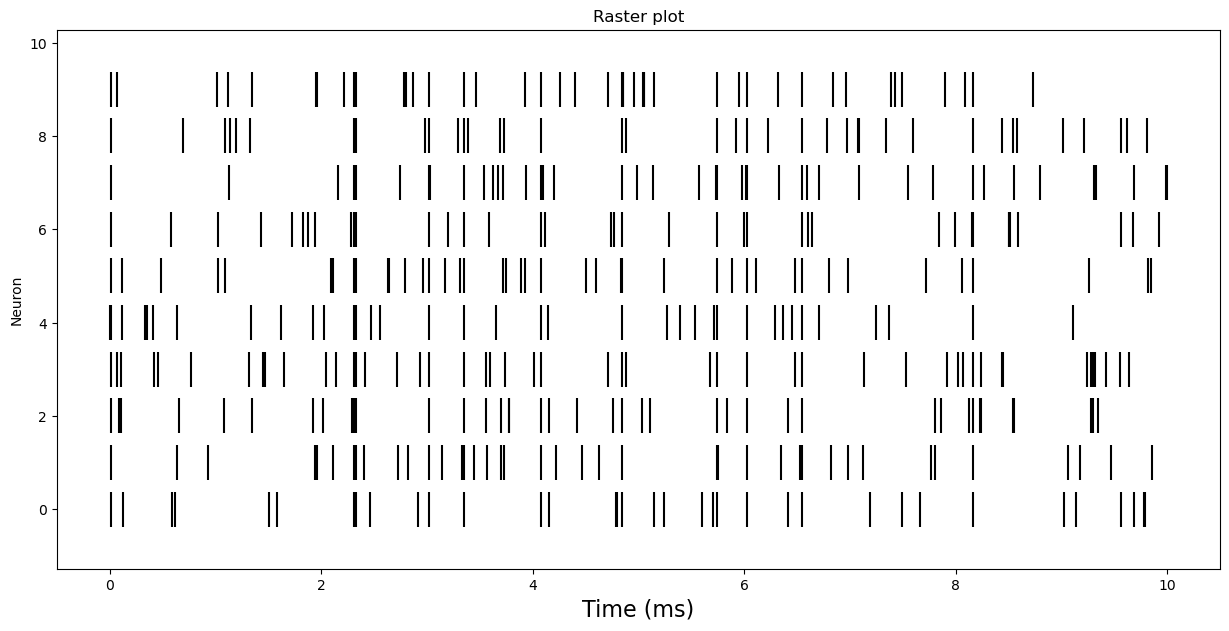

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.eventplot([spiketrains[i].magnitude for i in range(len(spiketrains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

All in one function:

In [5]:

A_sync = 0.02
shift = 0.

def generate_and_test(A_sync=A_sync, shift=shift):
    A = [0]+[1.-A_sync]+[0]*8+[A_sync]
    spiketrains = elephant.spike_train_generation.compound_poisson_process(
                             rate=5*pq.Hz, A=A, shift=shift*pq.ms, t_stop=10*pq.s)
    common_spikes =  ground_truth_spike_synchronous(spiketrains)

    for i in range(90):
        spiketrains.append(elephant.spike_train_generation.homogeneous_poisson_process(
            rate=5*pq.Hz, t_stop=10*pq.s))
    patterns = elephant.spade.spade(
                                spiketrains=spiketrains, binsize=1*pq.ms, winlen=1, min_spikes=3,
                                n_surr=100,dither=5*pq.ms,
                                psr_param=[0,0,0],
                                output_format='patterns')['patterns']
    
    idx_detect = pattern[0].get('windows_ids')
    common_spikes = np.array(list(common_spikes))*1000
    idx_real = common_spikes.astype(int)

    tp = len(list(set(idx_detect).intersection(real_idx)))
    fp = len(idx_detect) - tp
    fn = len(real_idx) - tp

    return tp, fp, fn


* changing the synchrony probability to check when SPADE will begin to fail:


In [6]:
tp, fp, fn = generate_and_test()
tp, fp, fn

/Users/laurentperrinet/opt/anaconda3/envs/brainhack/lib/python3.9/site-packages/elephant/spade.py:679: UserWarning: Optimized C implementation of FCA (fim.so/fim.pyd) not found in elephant/spade_src folder, or not compatible with this Python version. You are using the pure Python implementation of fast fca.
  warnings.warn(


Time for data mining: 11.420428037643433
